<h1 align="center"> CSE 242 Assignment 4, Fall 2022

<h2 align="center"> 3 Questions, 100 pts, due: 23:59 pm, Nov 11th, 2022
    
    Your name:Nistha Kumar          Student ID:2005437

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** EM algorithm (Mathematical Derivation)
- **Task 2:** K-Means implementation (Coding)
- **Task 3:** Kernel Methods with Noisy Setting (Coding)


# Question 1. (EM algorithm, 20 pts)

Derive the E-step and M-step update equations of EM algorithm for estimating the Gaussian mixture model $p(X;\theta) = ∑_{k=1}^{K} \pi_k N(x; \mu_k, \sigma_k^2)$ where $\pi_k$ is the mixture weight with $\pi_k \ge 0$  and  $∑_{k=1}^{K} \pi_k = 1$, and $\mu_k$, $\sigma^2_k$ are the mean and variance of the gaussian distribution corresponding to cluster k. 

For the E-step, first prove that $z_{ik} = \color{blue}{P(z_i = k | X, \mu ,\sigma, \pi)} = \dfrac {\pi_k N(x_i; \mu_k, \sigma_k^2)}{∑_{k=1}^{K} \pi_k N(x_i; \mu_k, \sigma_k^2)}$. Then, for the M-step, show the derivation to compute the updates for $(\mu_k, \pi_k)$. Note that, you don't need to show the derivation for $\sigma_k$. For each derivation step, mention the concept applied (e.g. just 2-3 keywords, e.g. formula for expectation, independence of datapoints, (f+g)' = f' + g', etc ... ). 

**Hint:** For the M-step, you need to solve for $\mu_k^t = \underset{\mu_k}{argmax} \ E_\color{blue}{p(Z | X, \mu^{(t-1)}, \sigma^{(t-1)}, \pi^{(t-1)})}{[\log p(X, Z | \mu, \sigma, \pi)]}$ (and similarly for $\pi_k$) by applying the first order conditions for function optimization (take derivative and set it to zero). Note that the term $\color{blue}{p(Z|X,\mu^{(t-1)},\sigma^{(t-1)},\pi^{(t-1)})}$ is the one computed in the E-step, and uses fixed values for $\mu, \sigma, \pi$ from the previous iteration (t-1).







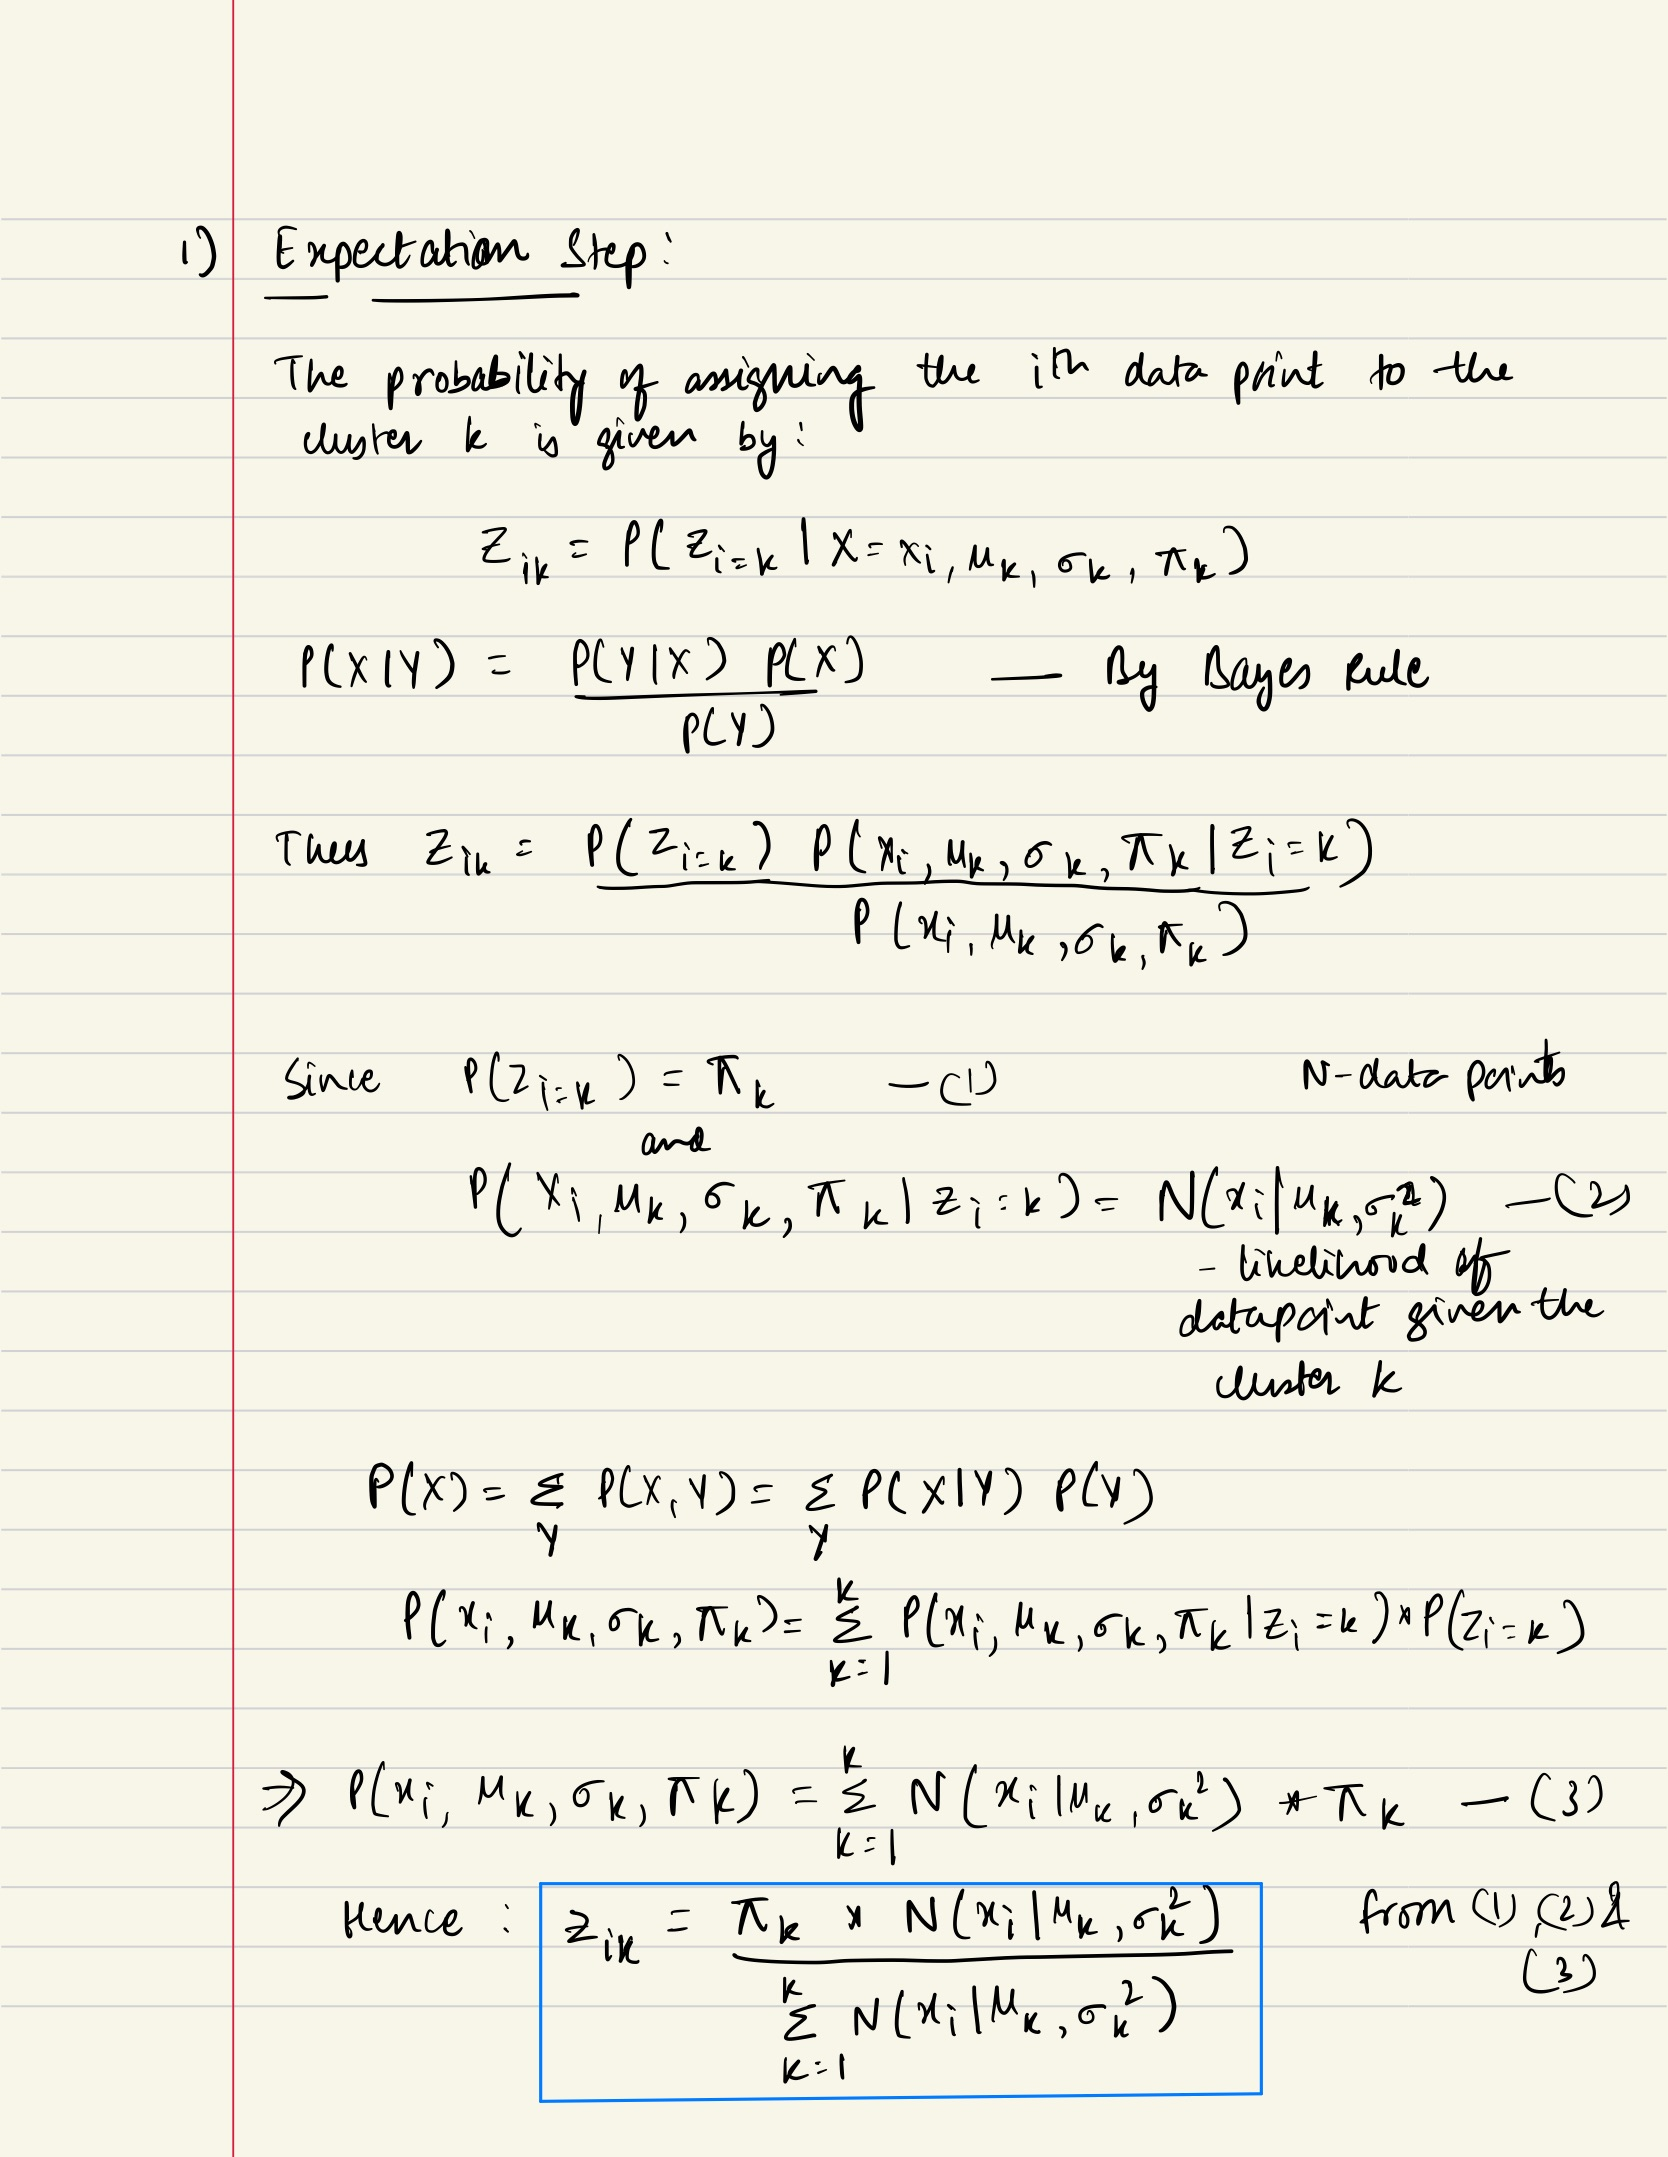

In [1]:
from IPython.display import Image
# Replace the figure name
Image(filename='1.1.jpg') 

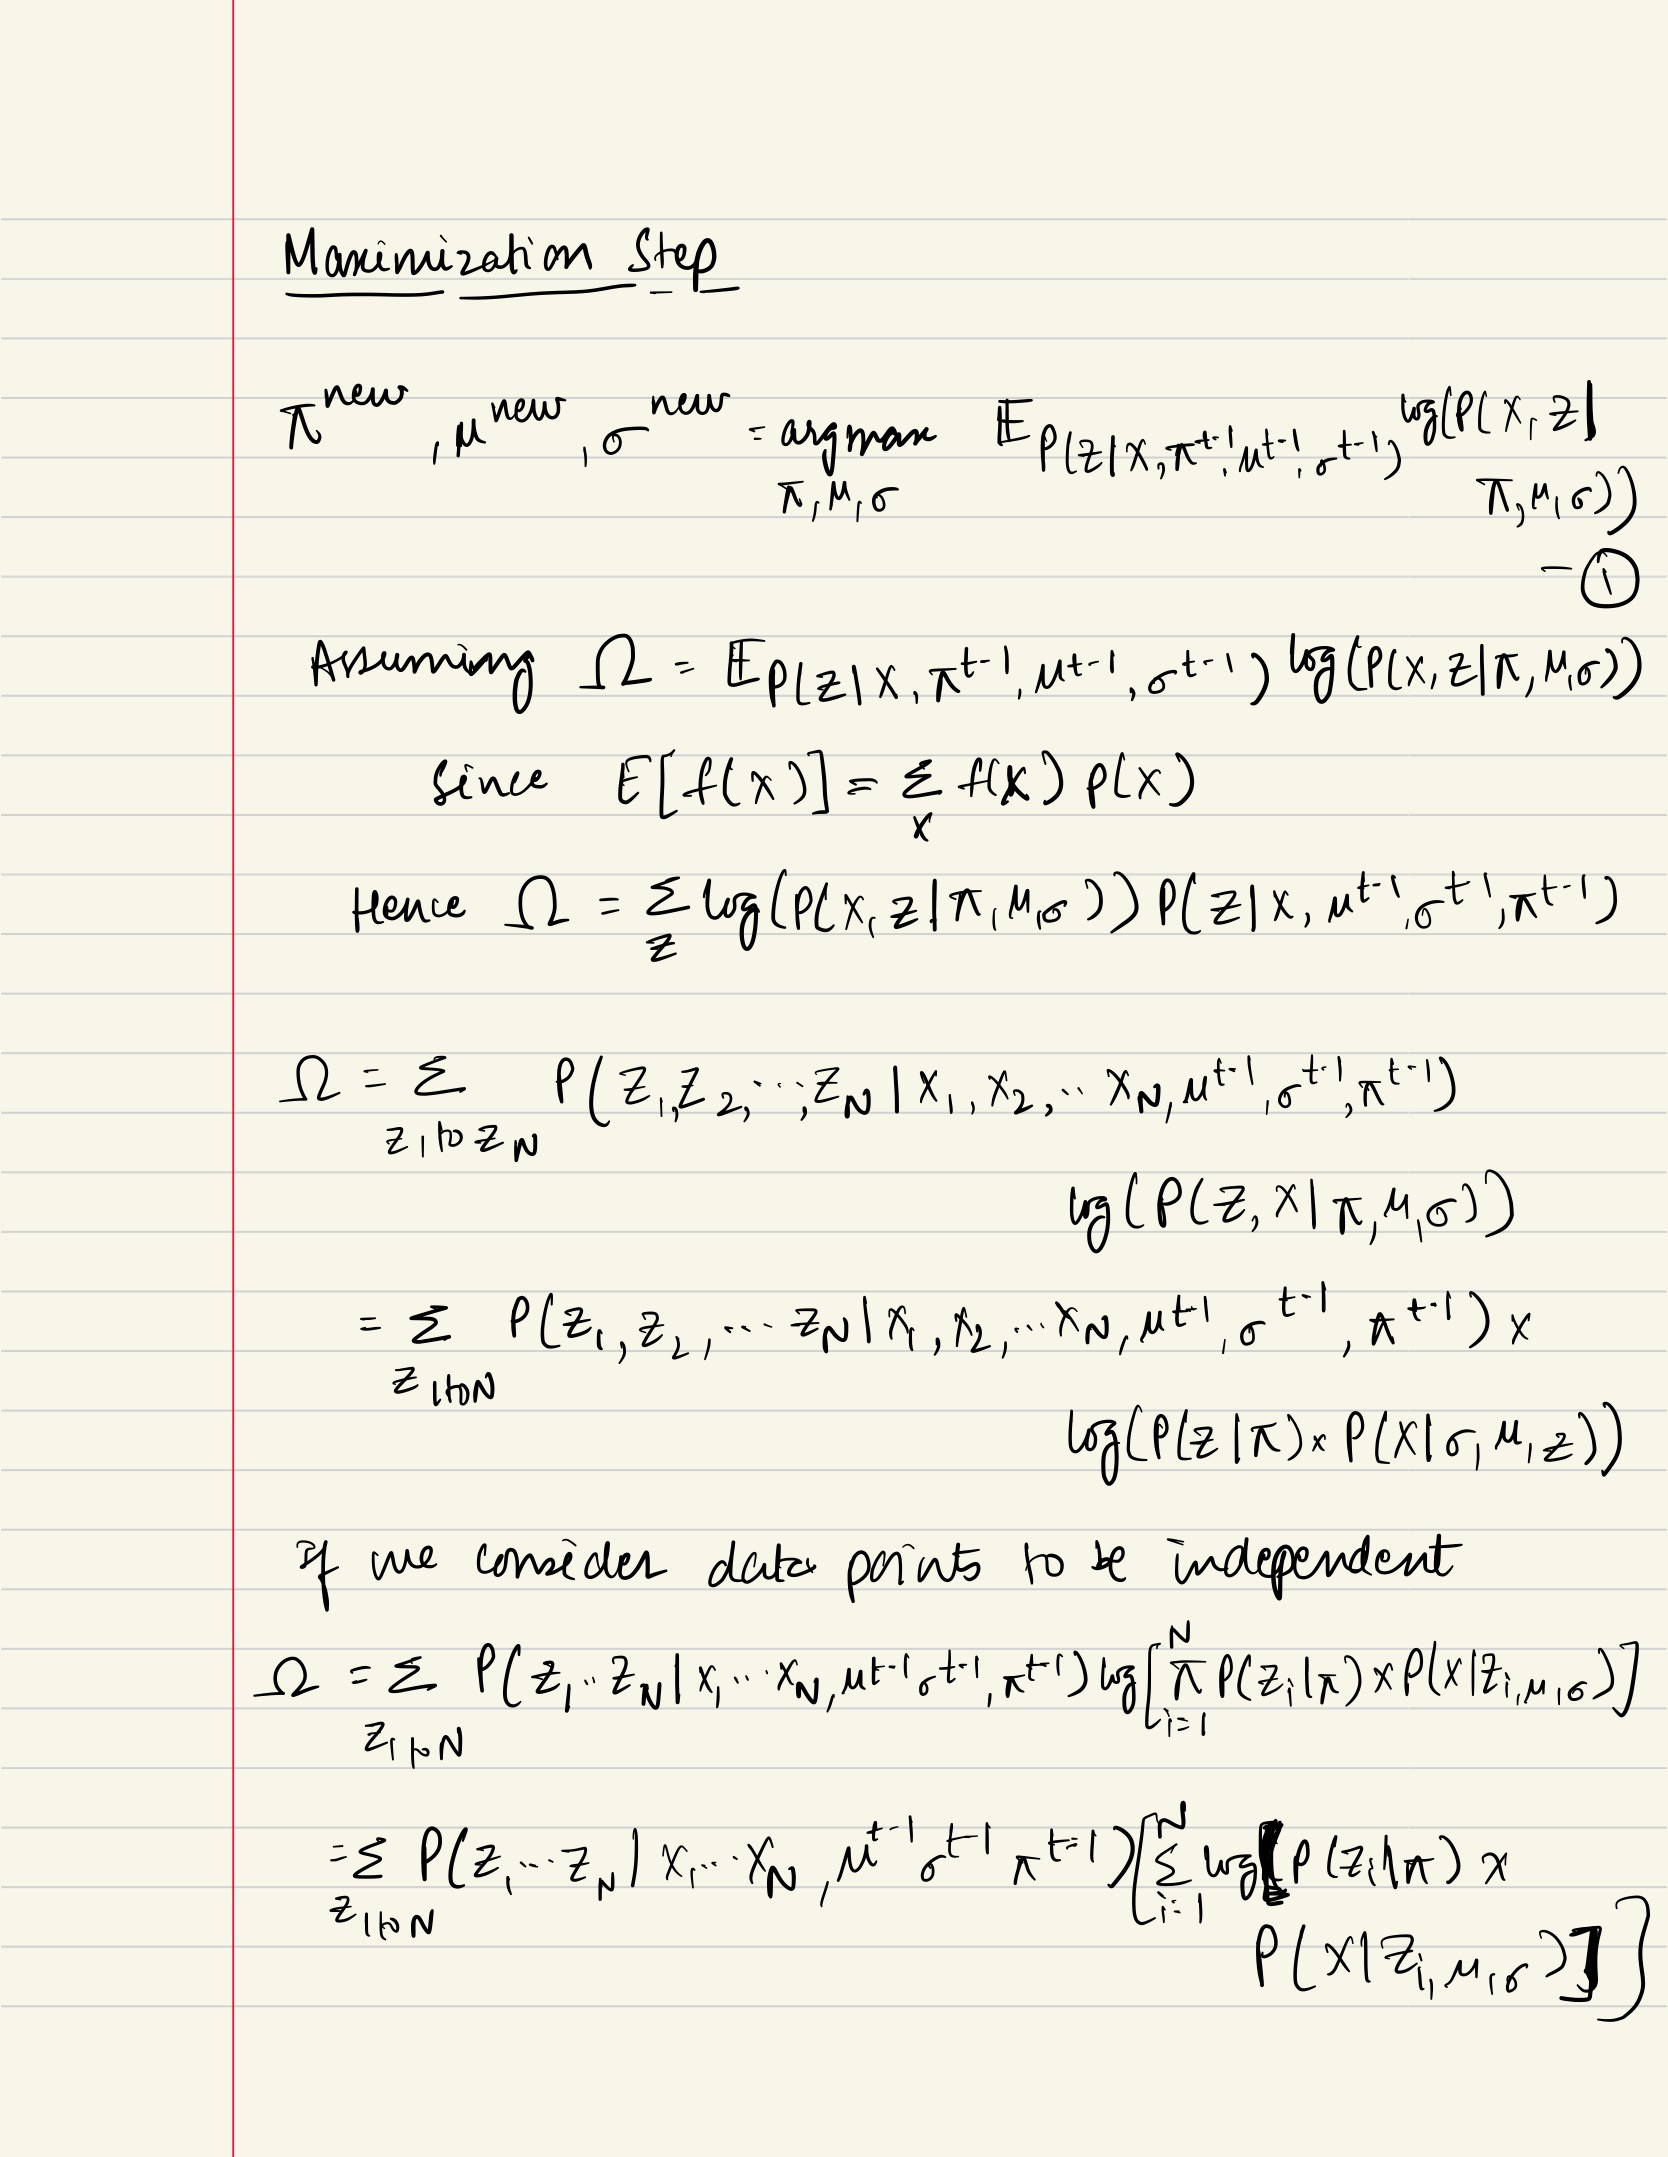

In [2]:
Image(filename='1.2.jpg')

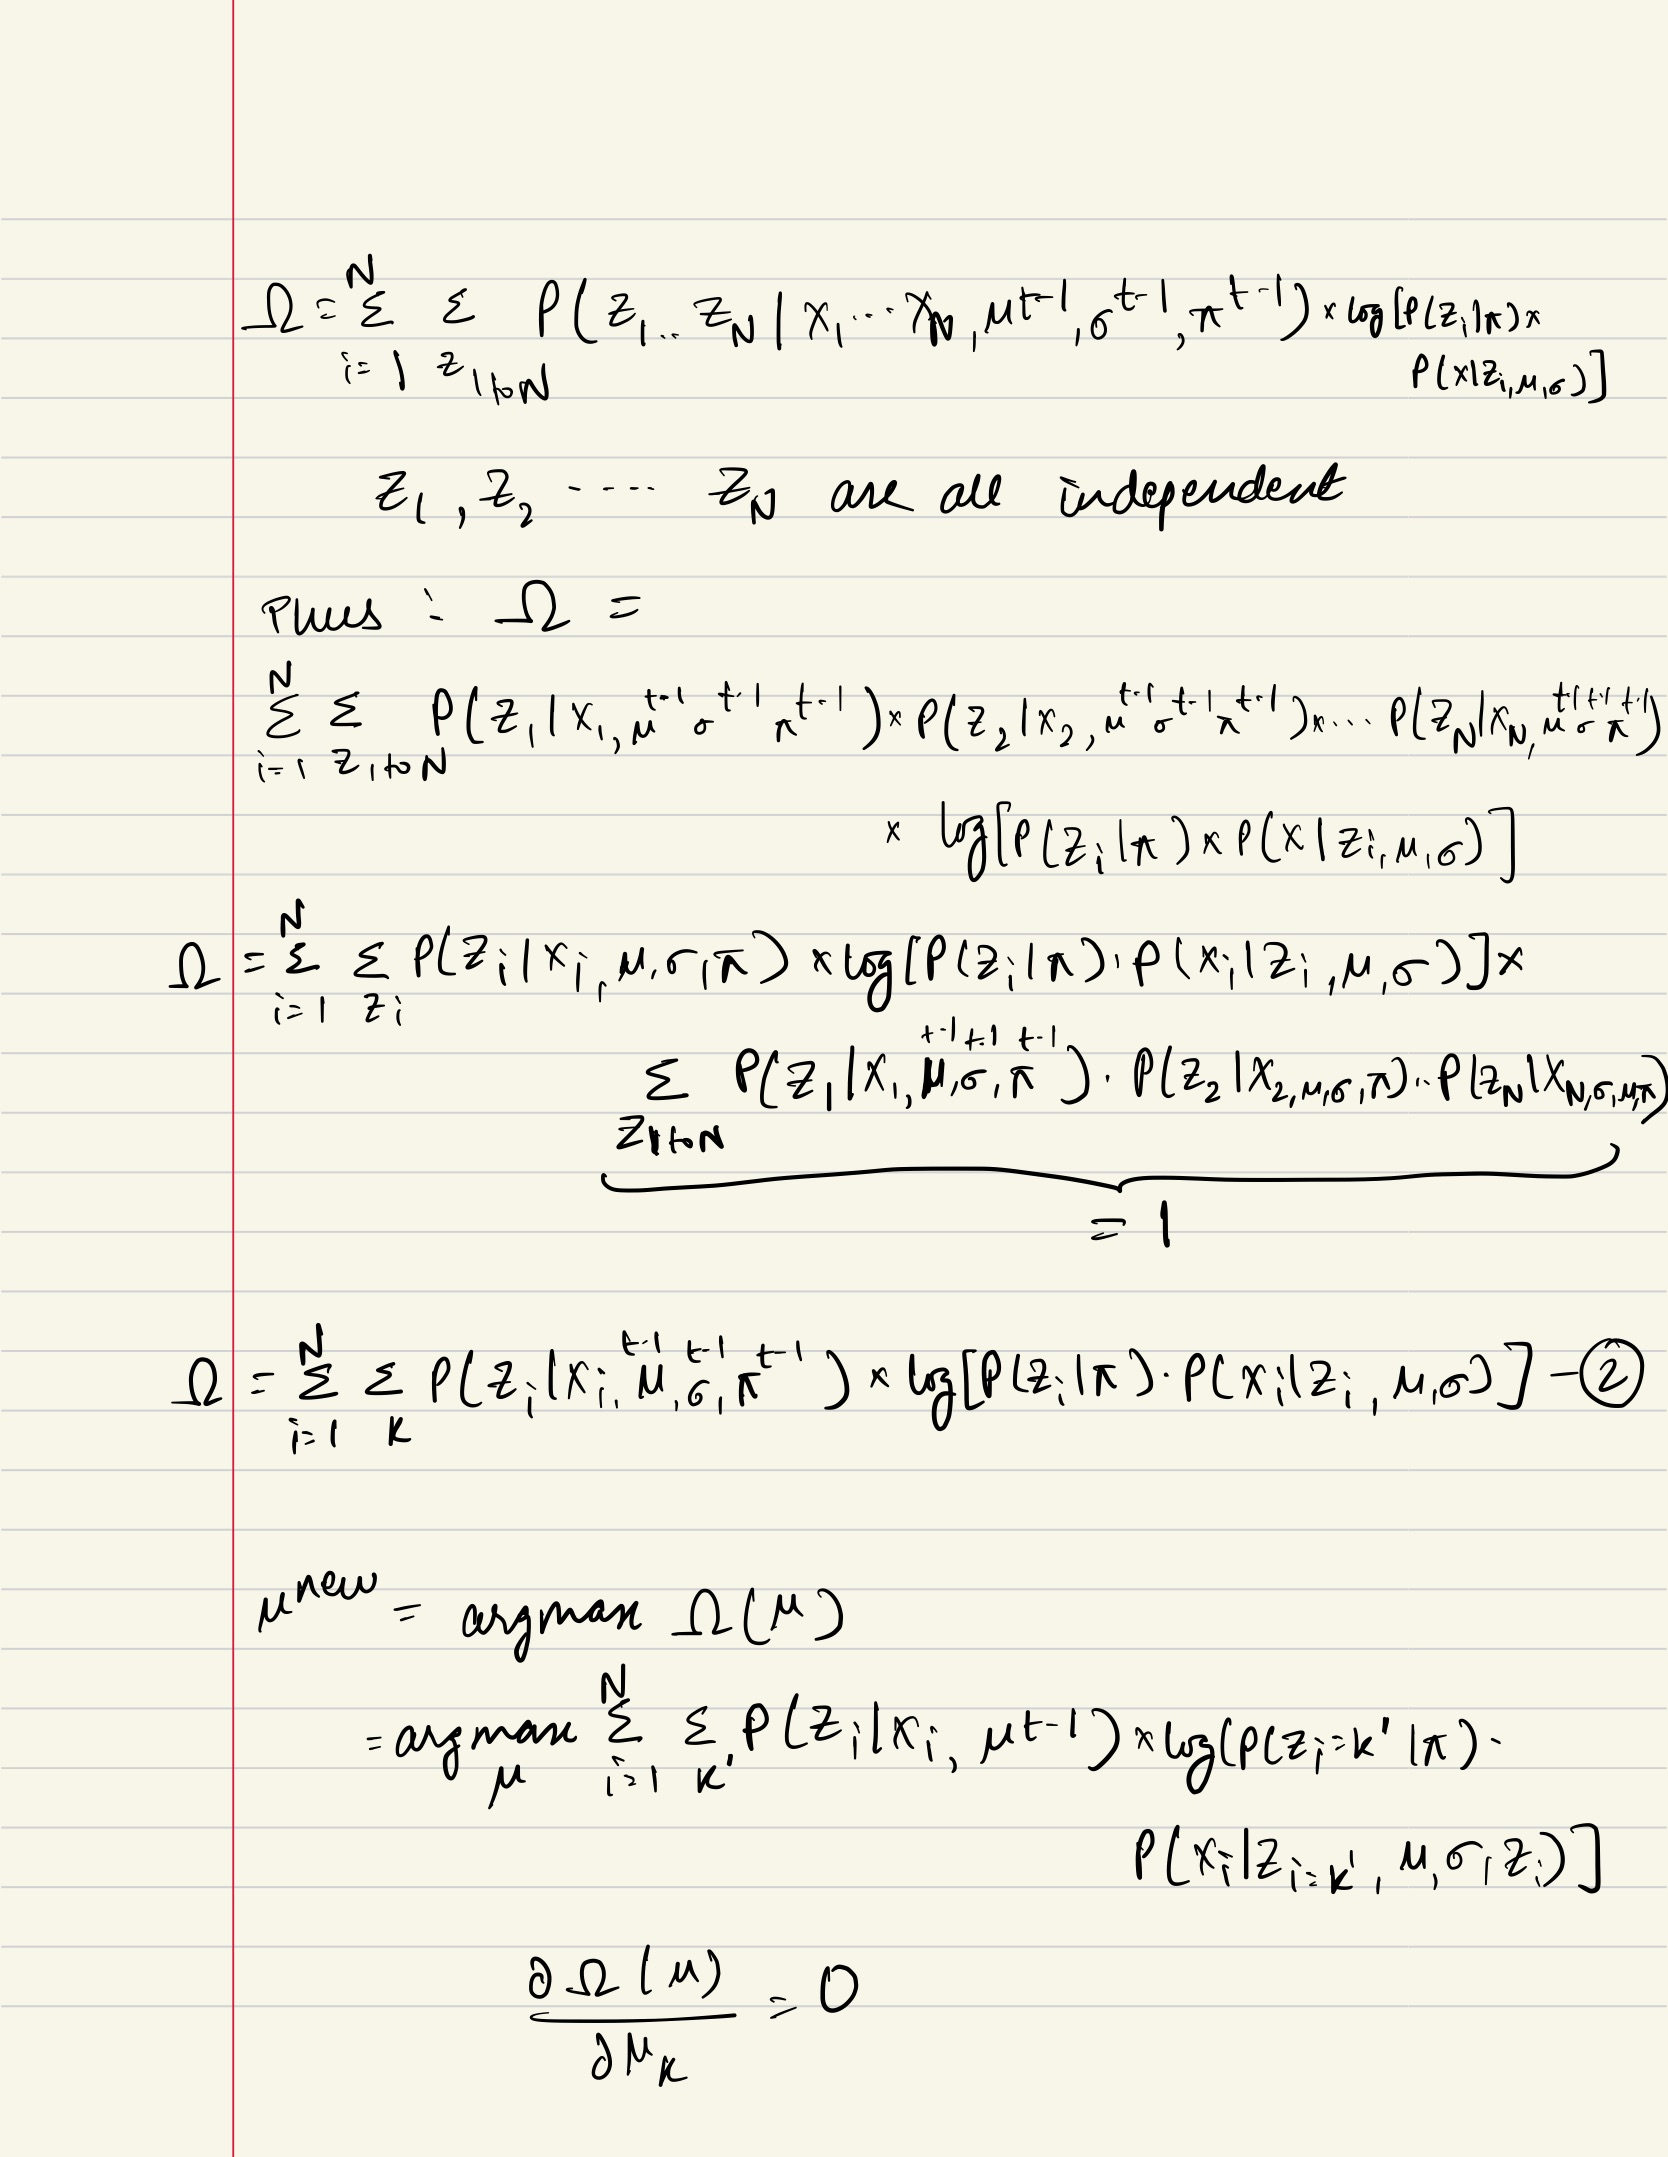

In [3]:
Image(filename='1.3.jpg')

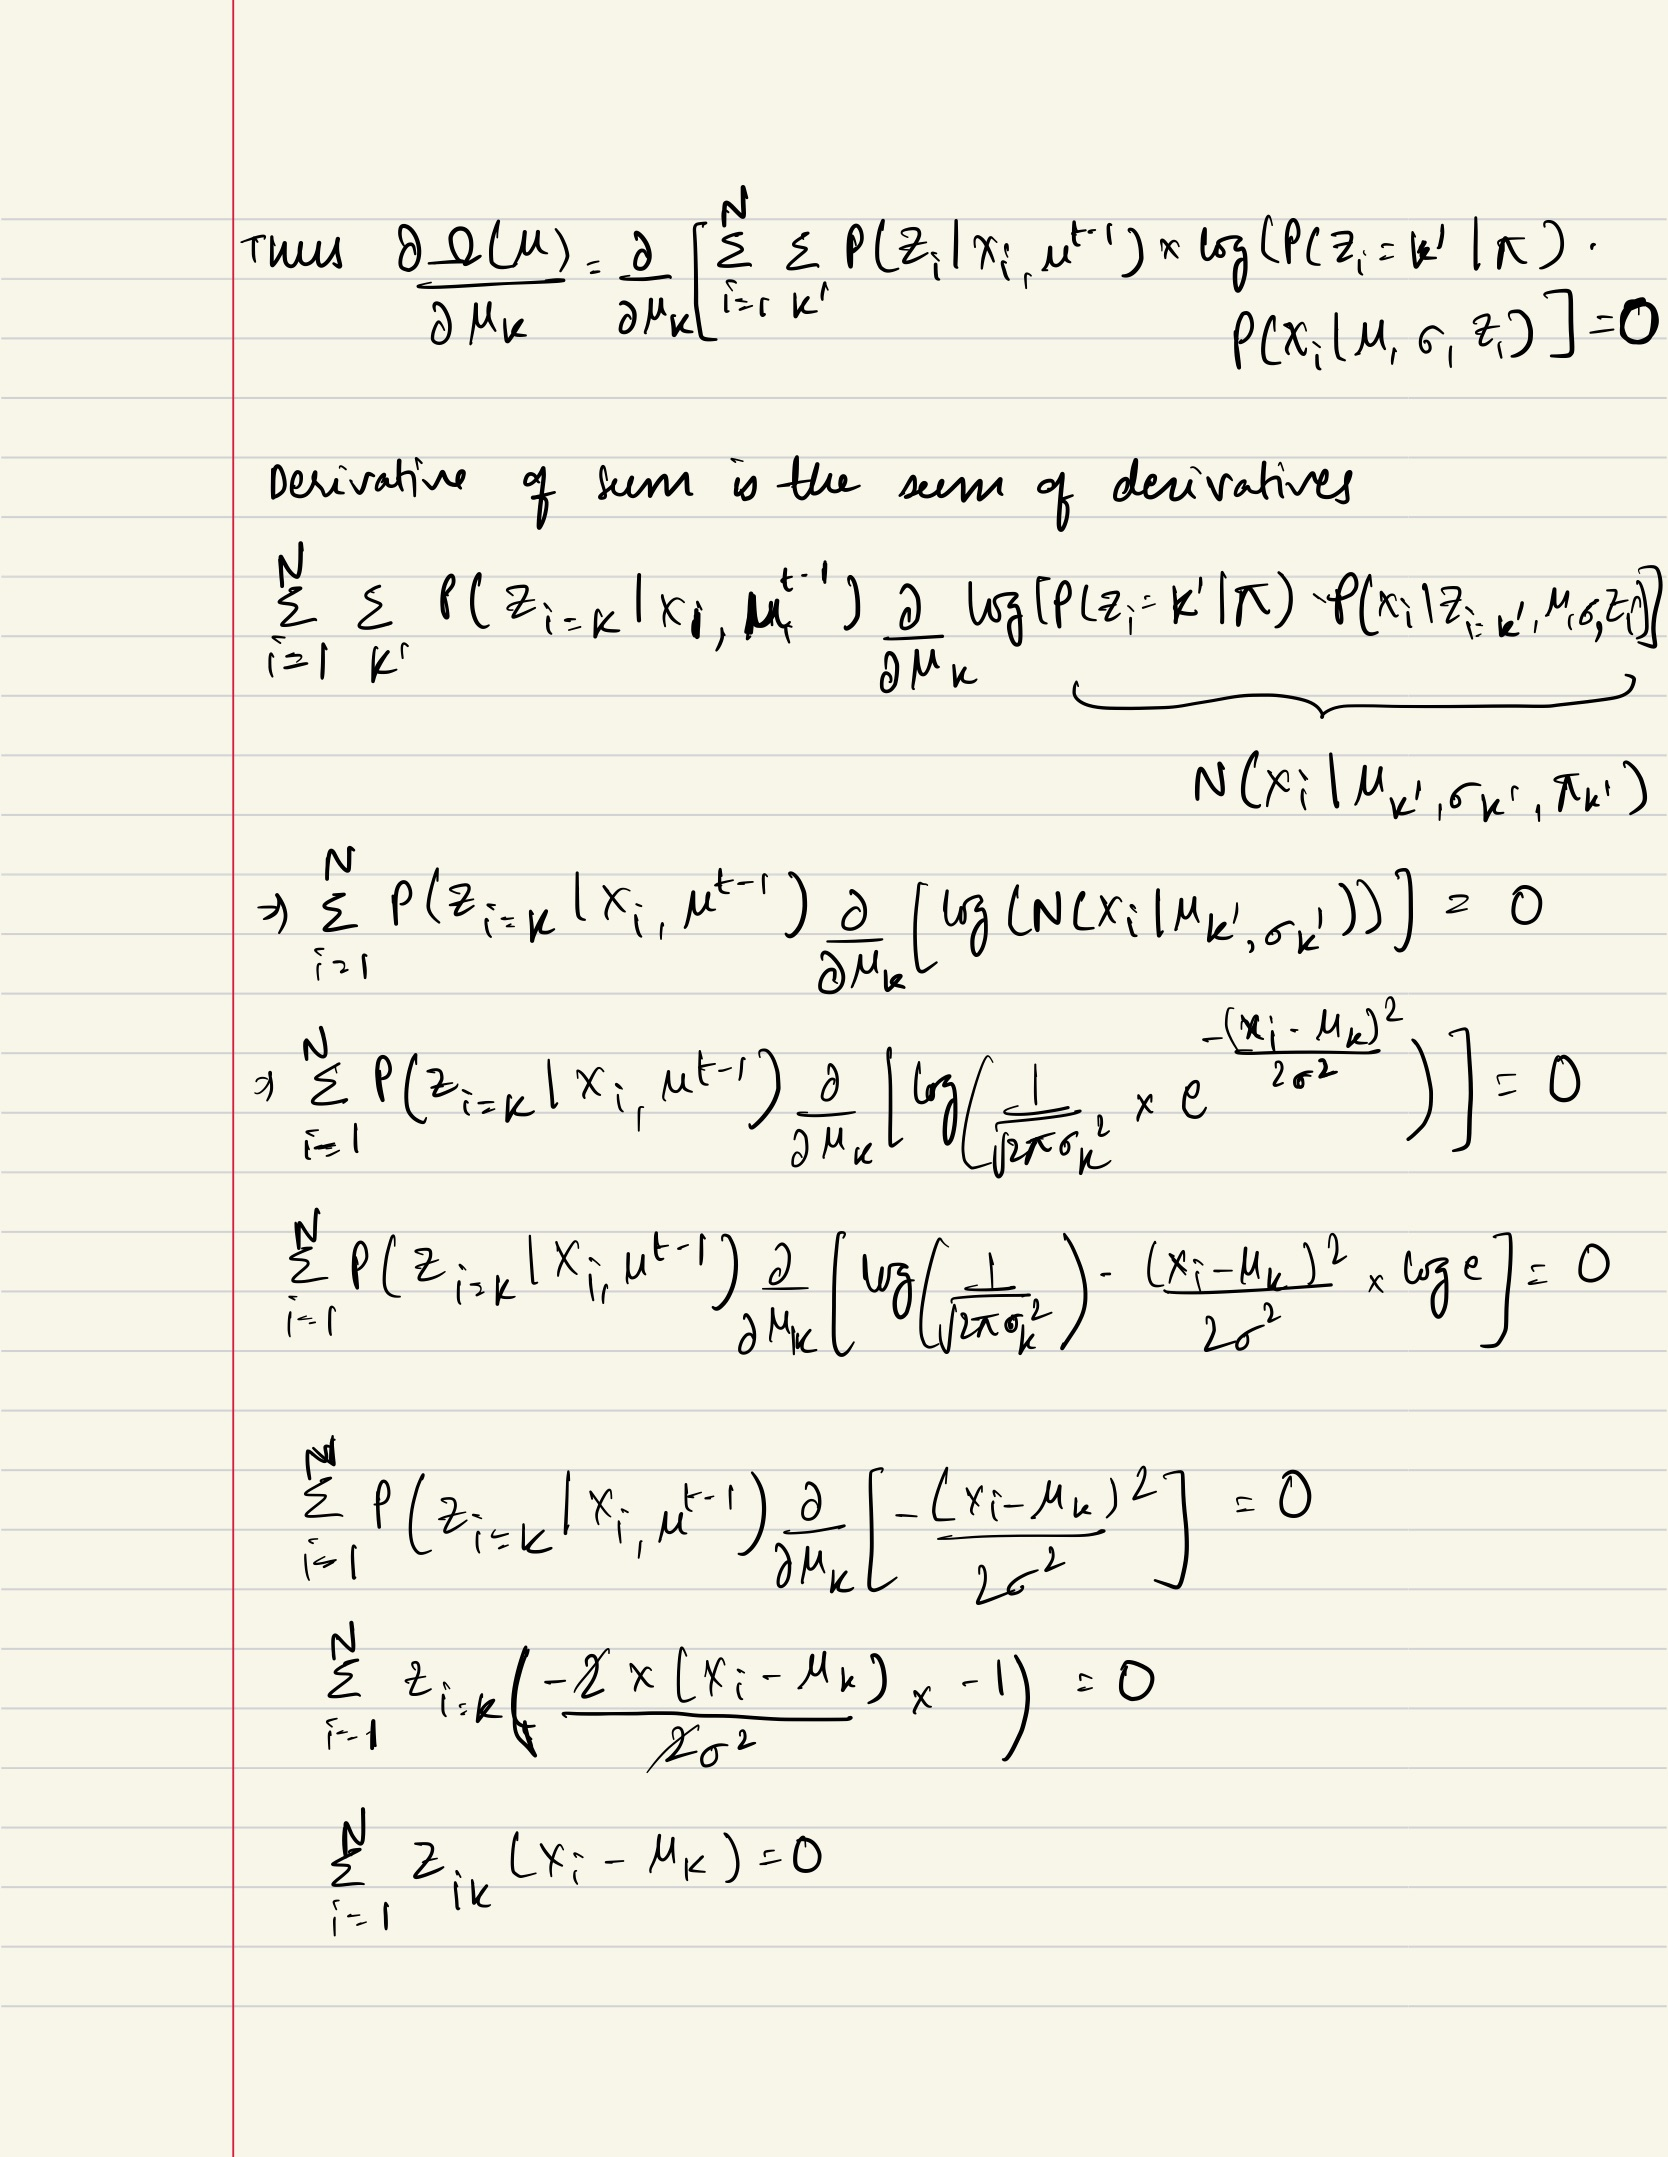

In [4]:
Image(filename='1.4.jpg')

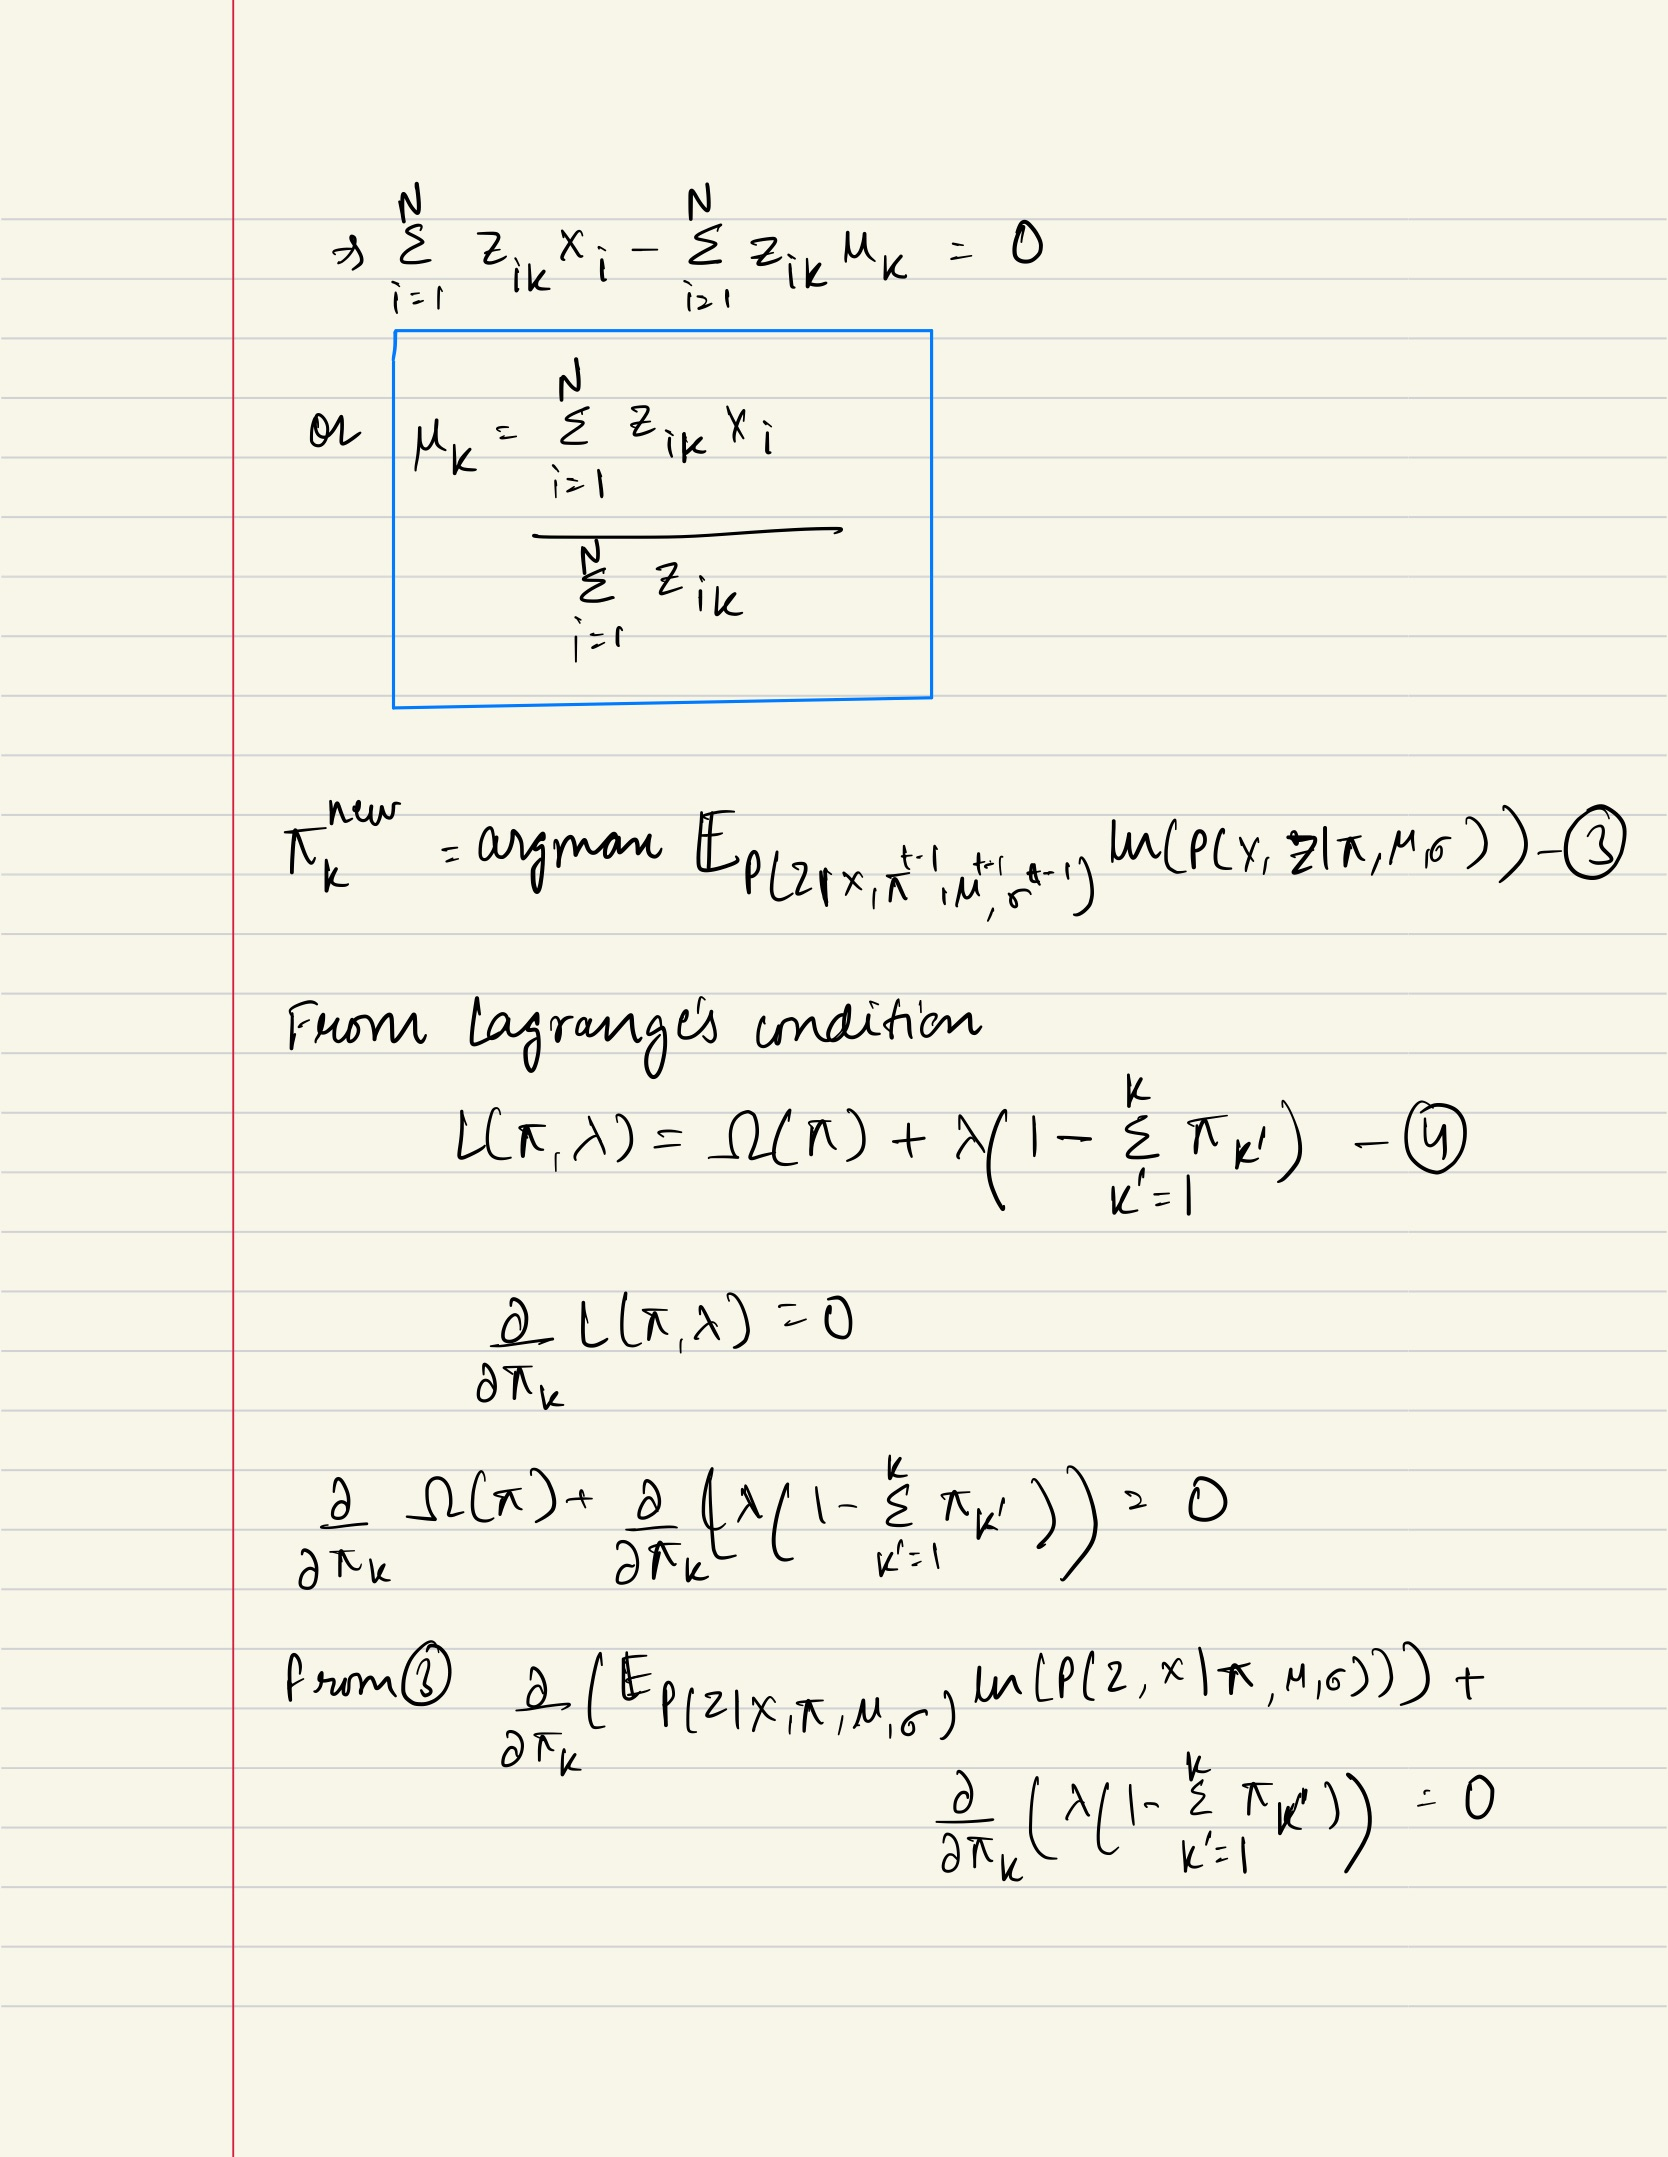

In [5]:
Image(filename='1.5.jpg')

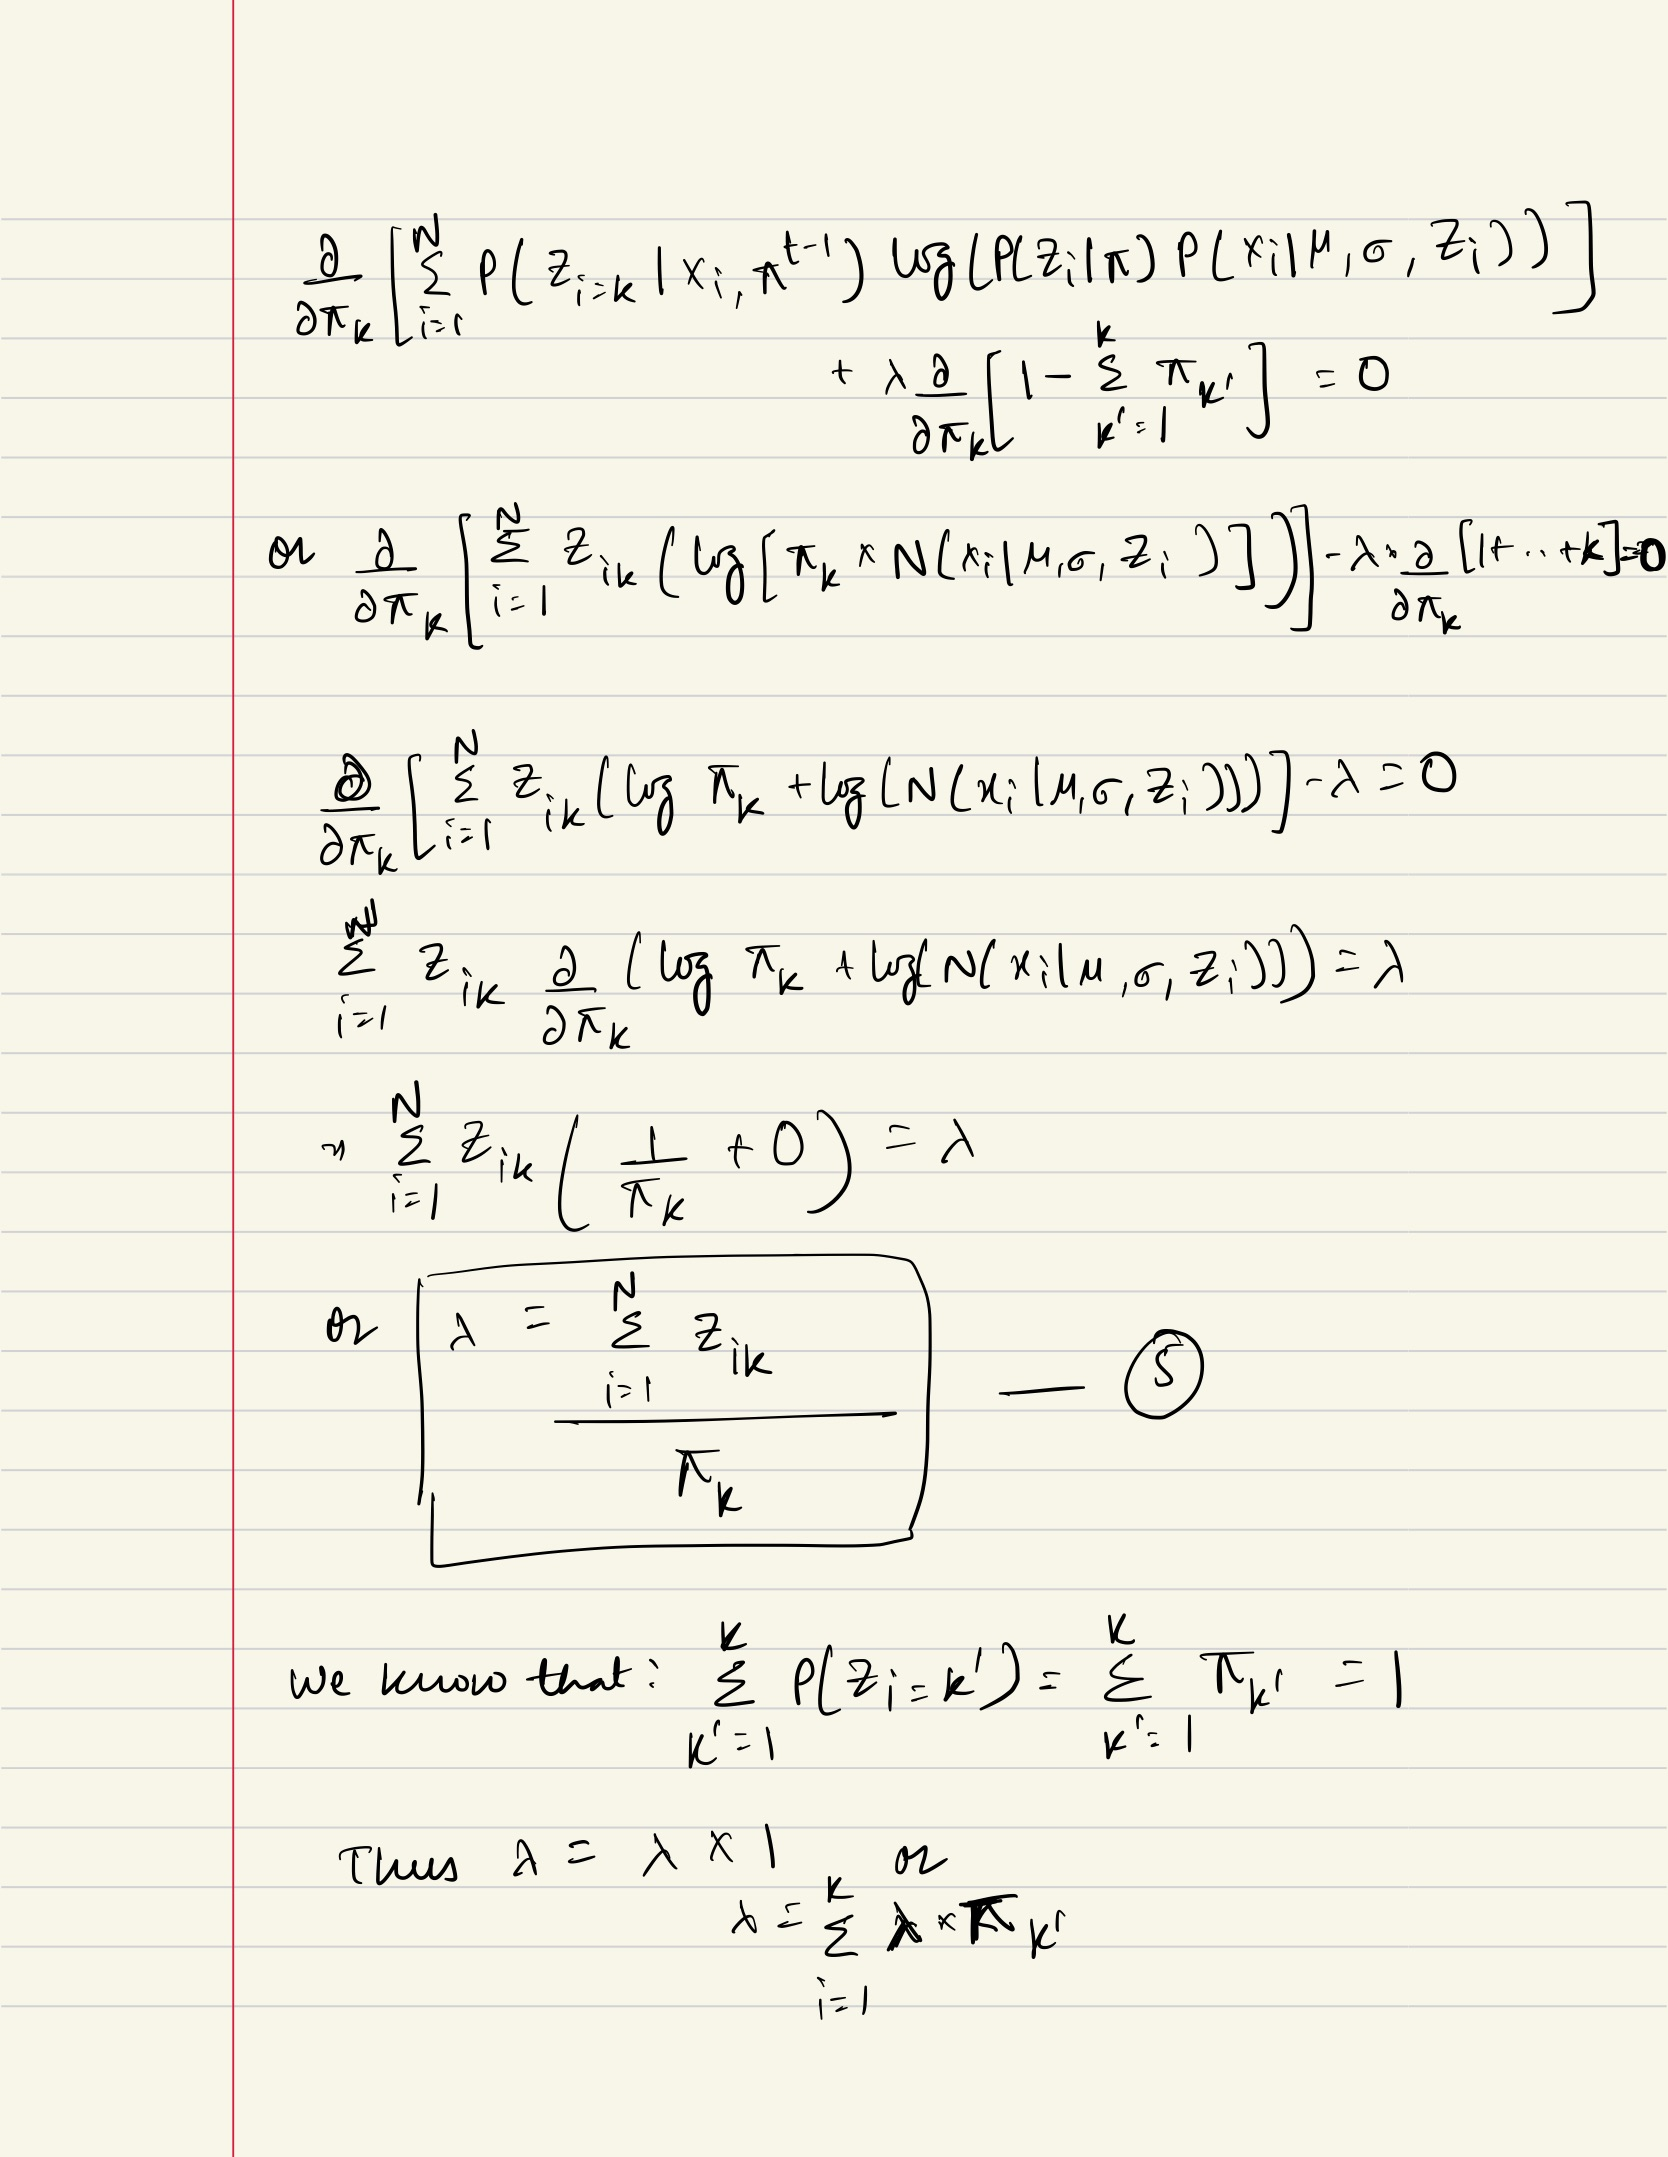

In [6]:
Image(filename='1.6.jpg')

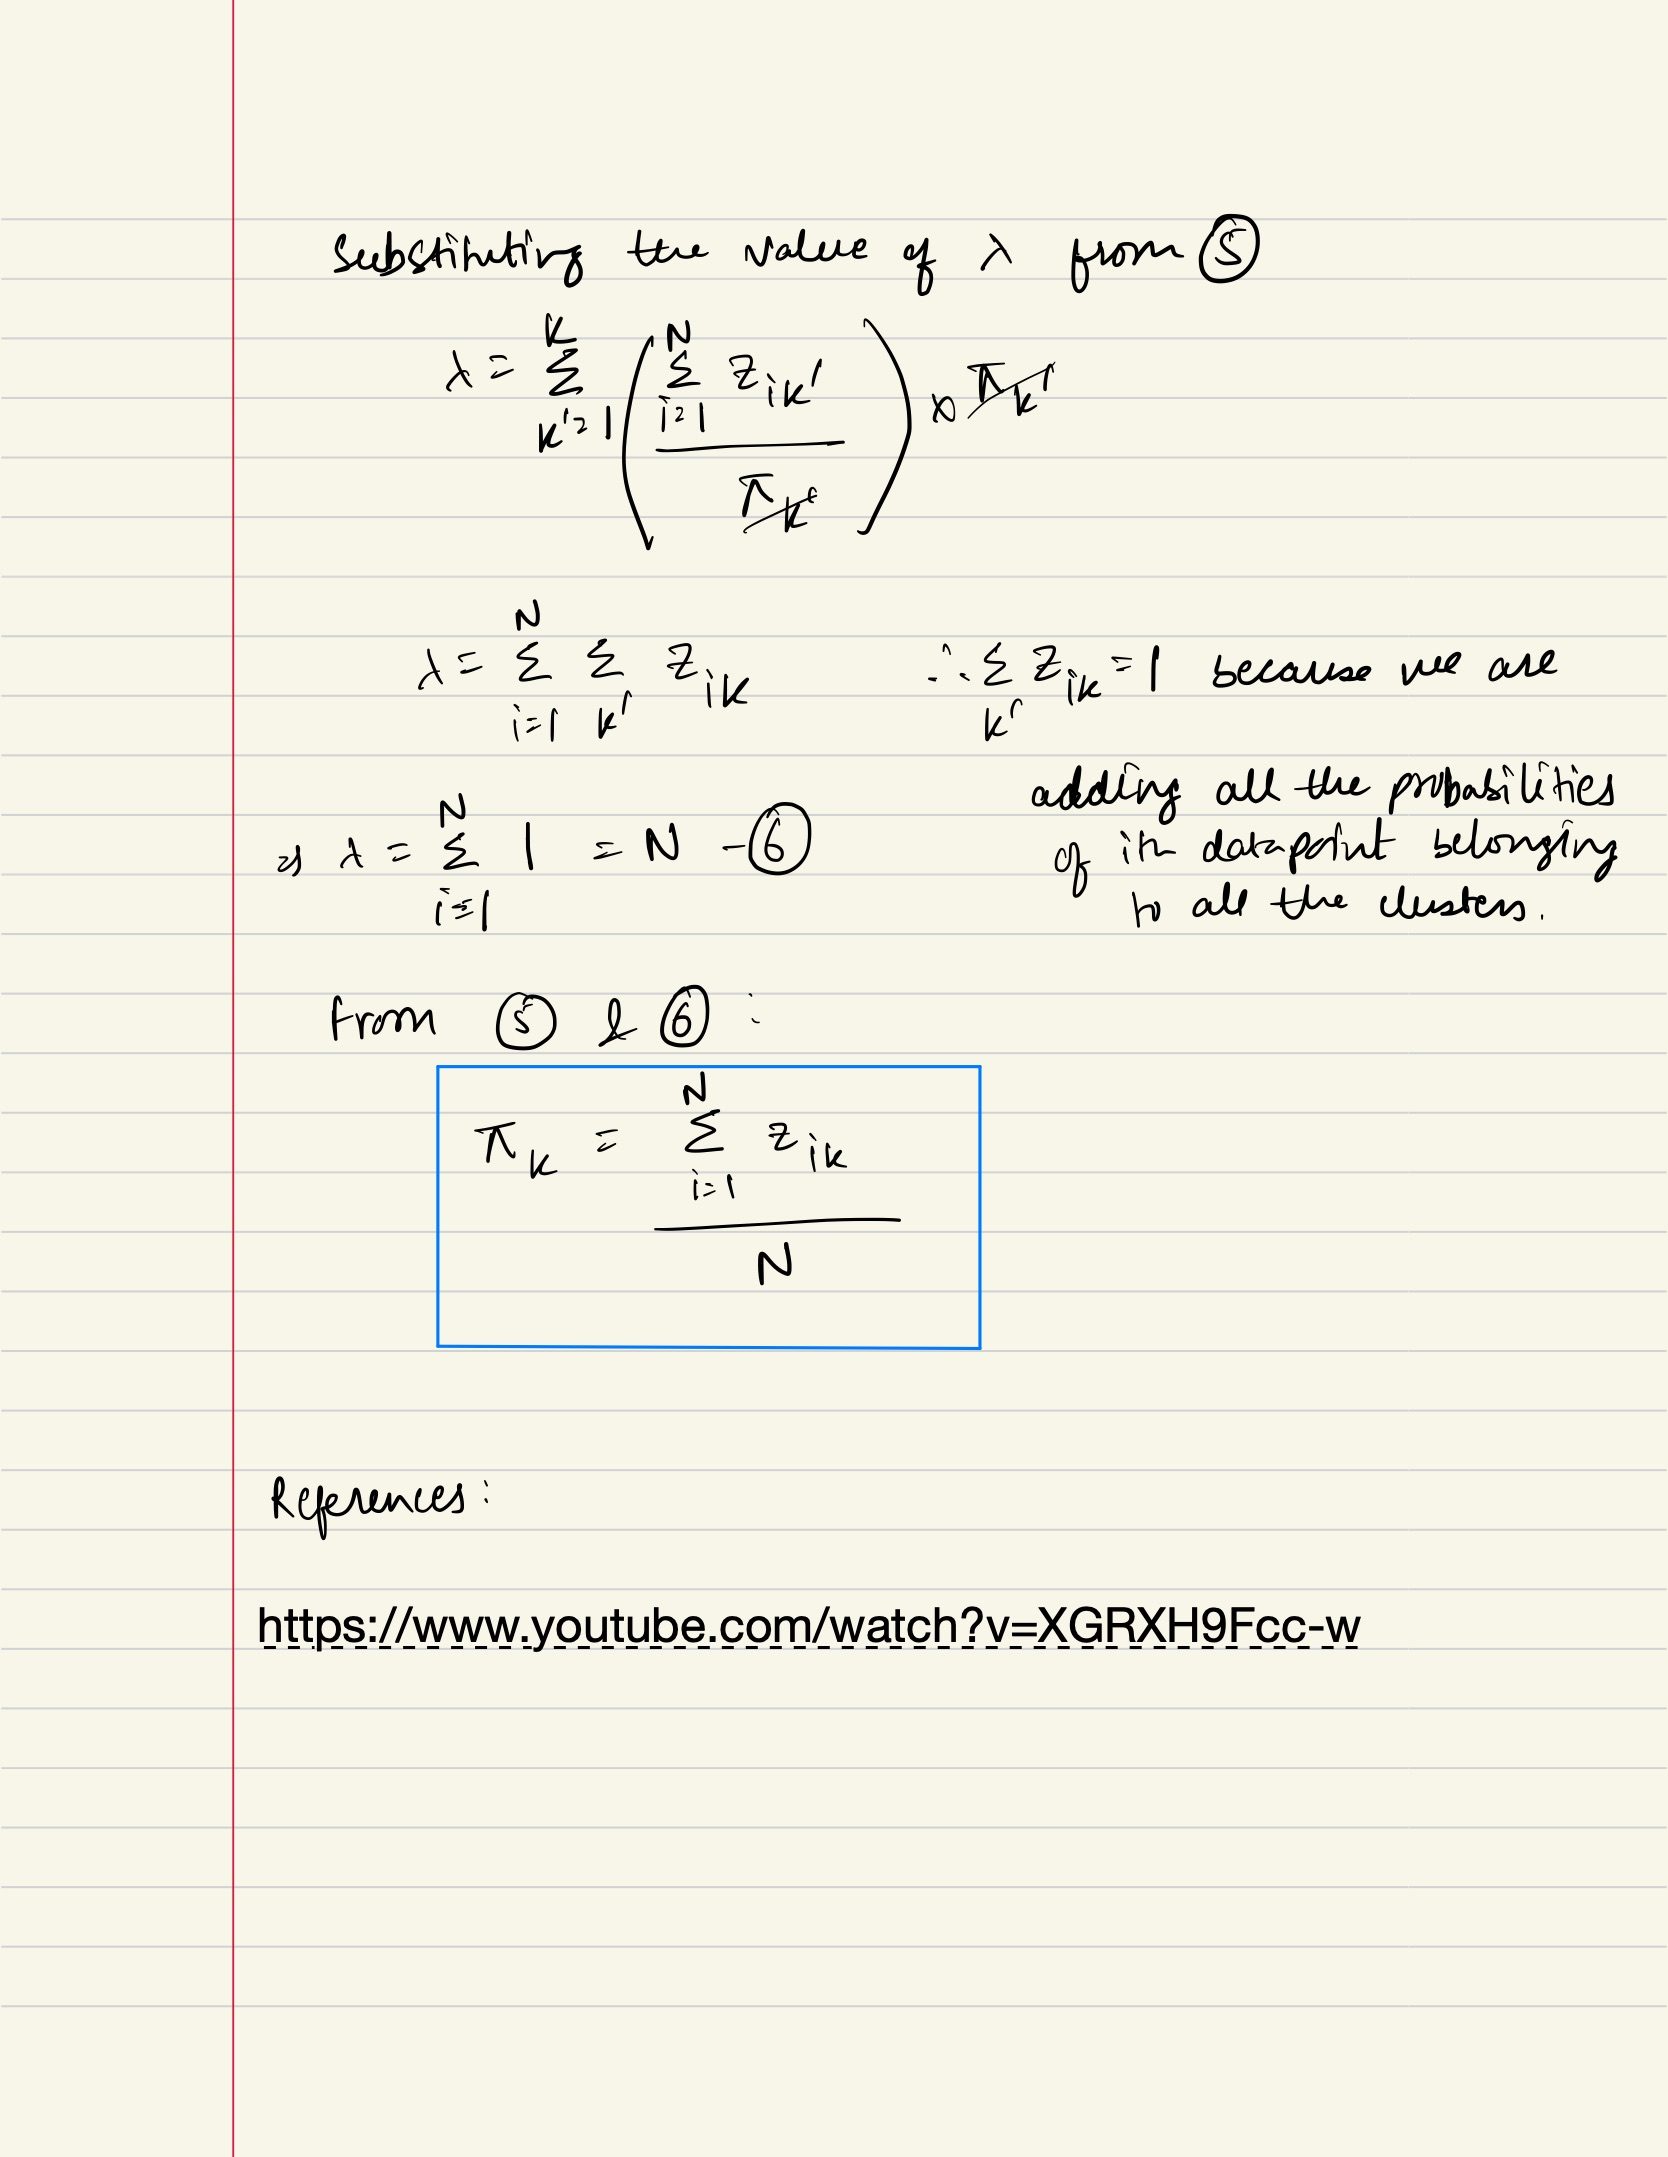

In [7]:
Image(filename='1.7.jpeg')

# Question 2. (K-Means implementation, 20 pts)

#### **Question 2.1.** Implement K-means in Python from scratch. Complete following sub-functions `update_centroids` and `update_assignments`.



In [8]:
import numpy as np
from scipy.spatial.distance import cdist
def update_assignments(data, centroids):

  ########################
  #### YOUR CODE HERE ####
  row, col = data.shape
  assignments = np.empty([row])
  distances = cdist(data, centroids)
  assignments=np.argmin(distances,axis=1)


  ## you will get cluster# 
  ##assignments here #####
  ########################

  return assignments

def update_centroids(data,centroids,assignments):

  ########################
  #### YOUR CODE HERE ####
  ########################
  K = centroids.shape[0]
  centroids=np.empty(centroids.shape)
  for i in range(K):
    centroids[i]=np.mean(data[assignments ==i], axis=0)

  return centroids


def kmeans(data, centroids, max_iterations):    

    for j in range(max_iterations):
        # update cluter assignments
        assignments = update_assignments(data,centroids)    # WRITE CODE FOR update_assignments
        
        # update centroid locations
        centroids = update_centroids(data,centroids,assignments)  # WRITE CODE FOR update_centroids
        
    # final assignment update
    assignments = update_assignments(data,centroids)
    return centroids, assignments

#### **Question 2.2.** Run your code on following toy dataset for different k-values, where k = {2, 3, 4, 6, 10} and plot the cluster assignments for different k's as shown in following diagram.

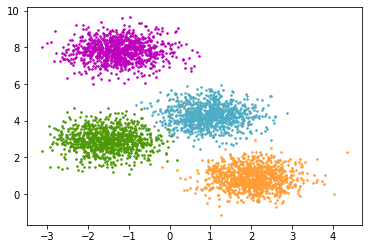

In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)


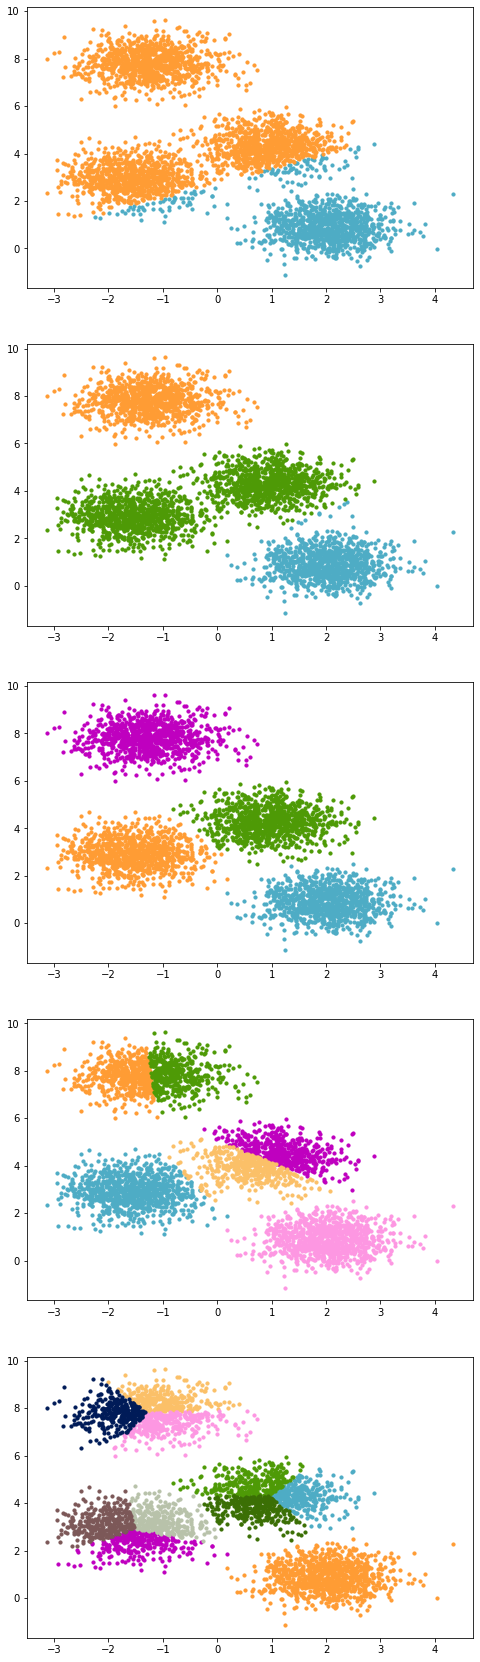

In [10]:

import numpy as np

# function to get initial cluster centroids; we randomly choose k points from the dataset 
def get_initial_clusters(k, X):
  random_indices = np.random.randint(0, X.shape[0], k)
  initial_centroids = X[random_indices]

  return initial_centroids

# your code here.
clusters=[2,3,4,6,10]
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m",
         "#fbc068", "#fd97e2", "#b8c2aa", "#7c5858",
         "#3b6f05", "#001b58"]
fig, axs = plt.subplots(len(clusters), figsize=[8,30])
for idx, i in enumerate(clusters):
    centroids=get_initial_clusters(i, X)
    centroids,assignments=kmeans(X,centroids,100)
    #print(assignments.shape)
    for k in range(i):
        cluster_data = assignments == k
        axs[idx].scatter(X[cluster_data, 0], X[cluster_data, 1], color=colors[k], s=10, )

  


# Question 3. (Kernel Methods with Noisy Setting, 60 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package ( scikit-learn svm.SVC class) to learn SVMs with a variety of parameter settings. 

In [11]:
# Your code here
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
np.random.seed(220)
mean1= (1,1)
cov1=[[1,0],[0,1]]
mean2=(-1,-1)
cov2=[[3,0],[0,3]]
df1 = pd.DataFrame(np.random.multivariate_normal(mean1,cov1,1000),columns=['x','y'])
df1['label']=+1
df2 = pd.DataFrame(np.random.multivariate_normal(mean2,cov2,1000),columns=['x','y'])
df2['label']=-1
df_train = pd.concat([df1,df2], ignore_index=True)
#Shuffling to avoid consistency
# df_train = shuffle(df_train)
df_train = df_train.reset_index(drop=True)
df_train



,x,y,label
0,-0.324352,-0.465870,1
1,-0.249991,1.654616,1
2,2.235651,-0.122390,1
3,1.414549,0.806798,1
4,-0.747681,2.687990,1
...,...,...,...
1995,-2.454008,-3.098631,-1
1996,-5.584851,-0.248678,-1
1997,2.095982,0.153912,-1
1998,1.639896,-3.109557,-1


In [12]:
df1 = pd.DataFrame(np.random.multivariate_normal(mean1,cov1,1000),columns=['x','y'])
df1['label'] = +1
df2 = pd.DataFrame(np.random.multivariate_normal(mean2,cov2,1000),columns=['x','y'])
df2['label'] = -1
df_test = pd.concat([df1,df2], ignore_index=True)
df_test

,x,y,label
0,-1.898160,1.556240,1
1,1.784113,-0.436965,1
2,1.986831,2.236635,1
3,-0.213913,1.240479,1
4,2.431783,0.760874,1
...,...,...,...
1995,-1.012130,0.737504,-1
1996,0.199889,1.865863,-1
1997,-2.578212,1.371016,-1
1998,-0.800268,-1.951012,-1


## (a -- 20 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
import random
X_train =df_train[['x', 'y']]
y_train =df_train['label'].values
X_test = df_test[['x', 'y']]
y_test = df_test['label'].values


model = SVC(kernel='rbf',C=1, gamma=0.01, random_state = 21)
model = model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score before flip: ",accuracy)

Accuracy score before flip:  0.8585


In [14]:
def flip_labels(pos,neg,prob_pos=0.35,prob_neg=0.20):
    pos_prob=np.random.random(size=pos.shape[0])
    flip_pos=np.where(pos_prob<prob_pos,-1,pos)
    
    neg_prob=np.random.random(size=neg.shape[0])
    flip_neg=np.where(neg_prob<prob_neg,1,neg)
    
    return np.hstack([flip_pos,flip_neg])

y_train_flipped= flip_labels(y_train[:1000],y_train[1000:])

In [15]:
model1 = SVC(kernel='rbf', probability=True, C=1, gamma=0.01)
model1 = model1.fit(X_train, y_train_flipped)


y_pred = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score after flip: ",accuracy)

Accuracy score after flip:  0.7895


## (b -- 20 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [16]:
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
best_knn_svm=0
best_k_svm=0

best_knn=0
best_k=0
best_knn_model=None

for k in range(1,100):
    knn_neigh=KNeighborsClassifier(n_neighbors=k)
    knn_neigh.fit(X_train,y_train_flipped)
    
    y_neigh_predict_test=knn_neigh.predict(X_train)
    if(accuracy_score(y_test,y_neigh_predict_test)*100>best_knn):
        best_knn=accuracy_score(y_test,y_neigh_predict_test)*100
        best_k=k
        best_knn_model=knn_neigh
        
#print(best_k)
svm_knn=SVC(kernel='rbf',random_state=0,gamma=.01,C=1)
    
y_train_knn=best_knn_model.predict(X_train)
svm_knn.fit(X_train,y_train_knn)
    
y_svm_knn_predict_test=svm_knn.predict(X_test)

best_knn_svm=accuracy_score(y_test,y_svm_knn_predict_test)*100
    
    #if(accuracy_score(y_test,y_svm_knn_predict_test)*100>best_knn_svm):
    #    best_knn_svm=accuracy_score(y_test,y_svm_knn_predict_test)*100
    #    best_k_svm=k
        
print(f"Accuracy with knn+svm: {best_knn_svm}")
#print(f"Accuracy with just knn: {best_knn},k neighbors:{best_k}")


Accuracy with knn+svm: 83.89999999999999


After correcting the noisy labels using knn, and then running svm on that- the accuracy has improved

## (c -- 20 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [17]:
# Your code here
from sklearn.cluster import KMeans
kmeans_cluster=KMeans(n_clusters=2,random_state=0).fit(X_train)
Y_kmeans=kmeans_cluster.labels_
#print(Y_kmeans)
for i,ele in enumerate(Y_kmeans):
    if Y_kmeans[i] ==1:
        Y_kmeans[i]=-1
    elif Y_kmeans[i]==0:
        Y_kmeans[i]=1
#print(Y_kmeans)
svm_kmeans=SVC(kernel='rbf', random_state=0,gamma=.01,C=1)
svm_kmeans.fit(X_train,Y_kmeans)

y_svm_kmeans_predict_test=svm_kmeans.predict(X_train)

print(f"Accuracy with kmeans+svm: {accuracy_score(y_test,y_svm_kmeans_predict_test)*100}")

Accuracy with kmeans+svm: 82.25


The accuracy after k-means is comparitively less as it is unsupervised and the labels are labelled based on the cluster. But the accuracy has still improved a little.

In [18]:
from sklearn.mixture import GaussianMixture
EM_cluster= GaussianMixture(n_components=2,random_state=0).fit(X_train)
Y_EM=EM_cluster.predict(X_train)
#print(Y_EM)

for i,ele in enumerate(Y_EM):
    if Y_EM[i] ==1:
        Y_EM[i]=-1
    elif Y_EM[i]==0:
        Y_EM[i]=1
#print(Y_EM)
svm_EM=SVC(kernel='rbf', random_state=0,gamma=.01,C=1)
svm_EM.fit(X_train,Y_EM)

y_svm_EM_predict_test=svm_EM.predict(X_train)

print(f"Accuracy with EM+svm: {accuracy_score(y_test,y_svm_EM_predict_test)*100}")

Accuracy with EM+svm: 83.35000000000001


The accuracy has improved compared to the one with noisy labels. Still its less than knn because EM is again unsupervised.